In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
import pandas as pd
import re
import os
from utils import prep_text
from scipy import linalg
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data = pd.read_excel('mentions.xlsx', skiprows = 7)

In [9]:
raw_text = data['Title']

In [10]:
remove_list = ['uh', 'huh', 'yeah', 'yes', 'a','of','at','s','for']

In [46]:
clean_text = prep_text(raw_text, remove_list)

In [47]:
clean_text = list(set(clean_text)) #Remove duplicate posts
clean_text = [sent for sent in clean_text if sent] #Remove empty sentence 

### SVD

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [52]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
#vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)

In [53]:
vectors = vectorizer_tfidf.fit_transform(clean_text).todense()

In [59]:
vectors.shape

(3027, 8519)

In [71]:
vocab = np.array(vectorizer_tfidf.get_feature_names())

In [60]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 58.6 s, sys: 2.66 s, total: 1min 1s
Wall time: 16.4 s


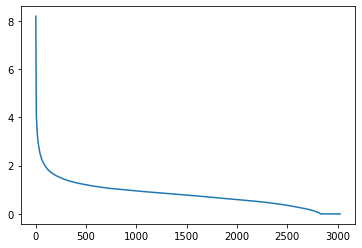

In [67]:
plt.plot(s);

In [74]:
num_top_words=20

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [76]:
show_topics(Vh[:20])

['259 32699548 226 32703679 apex category formal equipesf1 nopeys yep erza nan romeo 9811 blasted avoids alfa 32700025 32699367 7390',
 'nasdaq intc intel shares llc nyse management stock holdings american position investment capital express axp sells million asset advisors sold',
 'nyse axp express american shares llc management unilever gis mills asset general stock advisors position holdings nv sells ip paper',
 'nyse express american axp coronavirus covid 19 trump unilever hilton market briefings mills general gis dozen shares warned 2020 nv',
 'trump briefings dozen warned nyse threat agencies axp express american daily coronavirus times ignored classified warnings feb jan intel january',
 'stock holdings unilever management nyse general mills gis etf nv adobe adbe ip ishares pff paper preferred corp international hilton',
 'shares market growth sold sells general mills gis 2019 technavio boost 2023 nyse intc capital intel estimates 2020 unilever pre',
 'shares hilton sold sells c